In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_breastCancer = pd.read_csv("https://raw.githubusercontent.com/hetasks/loppuprojektiSyvaOppiminen/main/Breast_Cancer.csv", sep=",")


Tutkitaan sarakkeita otsikkotasolla mitä datasta löytyy.

In [3]:
df_breastCancer.columns.tolist() 

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status;']

In [4]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive;
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive;
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive;
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive;
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive;


Seuraavassa nähdään tarkemmin kuinka monta saraketta ja kuinka monta riviä data sisältää. Nähdään myös, että osa datasta on numeerista dataa ja osa on datatyypiltään object.

In [5]:
df_breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

Tarkistetaan vielä, että ei ole tyhjiä arvoja.

In [6]:
df_breastCancer.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status;                   0
dtype: int64

In [7]:
df_breastCancer['Status;'].value_counts()

Alive;    3398
Dead;      607
Alive       10
Dead         9
Name: Status;, dtype: int64

Yllä olevasta nähdään, että sarakkeessa 'Status' on kirjattu arvoja hieman eri tavoilla. Muuten nämä niin, että sarakkeiden arvoista poistetaan ylimääräiset kaksoispisteet.

In [8]:
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace(['Alive;'], 'Alive')

In [9]:
df_breastCancer['Status;'] = df_breastCancer['Status;'].replace(['Dead;'], 'Dead')

In [10]:
df_breastCancer['Status;'].value_counts()

Alive    3408
Dead      616
Name: Status;, dtype: int64

Koska koneoppisen algoritmit ymmärtävät suurimmaksi osaksi numeerista dataa, niin muutetaan object-tyyppiset sarakkeet numeerisiksi.

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
def encodeColumn(parameter):
    df_breastCancer[parameter] = encoder.fit_transform(df_breastCancer[parameter])

# Run Function
listColumn = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status;']
for i in listColumn:
    encodeColumn(i)
df_breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int32
 2   Marital Status          4024 non-null   int32
 3   T Stage                 4024 non-null   int32
 4   N Stage                 4024 non-null   int32
 5   6th Stage               4024 non-null   int32
 6   differentiate           4024 non-null   int32
 7   Grade                   4024 non-null   int32
 8   A Stage                 4024 non-null   int32
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int32
 11  Progesterone Status     4024 non-null   int32
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status;              

In [12]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


Nyt sarakkeessa 'Status' arvo 0 tarkoittaa, että henkilö on elossa tarkkailuajan aikana ja arvo 1 tarkoittaa, että henkilö on kuollut tarkkailuajan kuluessa. 

Tarkastellaan sarakkeita numeerisena datana.

In [13]:
df_breastCancer.describe().round(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
count,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00,4024.00
mean,53.97,1.78,1.37,0.78,0.44,1.32,0.69,2.13,0.98,30.47,0.93,0.83,14.36,4.16,71.30,0.15
std,8.96,0.56,1.06,0.77,0.69,1.27,1.02,0.64,0.15,21.12,0.25,0.38,8.10,5.11,22.92,0.36
min,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,47.00,2.00,1.00,0.00,0.00,0.00,0.00,2.00,1.00,16.00,1.00,1.00,9.00,1.00,56.00,0.00
50%,54.00,2.00,1.00,1.00,0.00,1.00,0.00,2.00,1.00,25.00,1.00,1.00,14.00,2.00,73.00,0.00
75%,61.00,2.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,38.00,1.00,1.00,19.00,5.00,90.00,0.00
max,69.00,2.00,4.00,3.00,2.00,4.00,3.00,3.00,1.00,140.00,1.00,1.00,61.00,46.00,107.00,1.00


<AxesSubplot:>

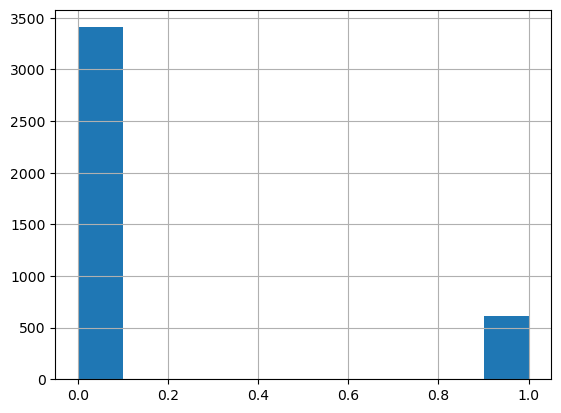

In [14]:
df_breastCancer['Status;'].hist()

Etsitään korrelaatiota 'Statuksen' suhteen. Arvot voivat olla välillä pienimmillään -1 ja suurimmillaan 1. Mitä lähempänä arvoa 1 ollaan, sen suurempi korrelaatio. Näissä tuloksissa ei näy vahvaa korrelaatiota minkään muun muuttujan kanssa.

In [15]:
corr_matrix = df_breastCancer.corr()
corr_matrix["Status;"].sort_values(ascending=False)

Status;                   1.000000
6th Stage                 0.257636
Reginol Node Positive     0.256638
N Stage                   0.255772
T Stage                   0.154699
Tumor Size                0.134205
Grade                     0.134170
Age                       0.055921
Regional Node Examined    0.034772
Marital Status            0.033289
differentiate            -0.018513
Race                     -0.050040
A Stage                  -0.096584
Progesterone Status      -0.177079
Estrogen Status          -0.184650
Survival Months          -0.476514
Name: Status;, dtype: float64

Tutkitaan vielä tarkemmin näiden muuttujien 6 ylimpänä olevaa arvoa selviytymiskuukausien suhteen.

array([[<AxesSubplot:xlabel='6th Stage', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='N Stage', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='T Stage ', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Tumor Size', ylabel='6th Stage'>,
        <AxesSubplot:xlabel='Grade', ylabel='6th Stage'>],
       [<AxesSubplot:xlabel='6th Stage', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='N Stage', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='T Stage ', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Tumor Size', ylabel='Reginol Node Positive'>,
        <AxesSubplot:xlabel='Grade', ylabel='Reginol Node Positive'>],
       [<AxesSubplot:xlabel='6th Stage', ylabel='N Stage'>,
        <AxesSubplot:xlabel='Reginol Node Positive', ylabel='N Stage'>,
        <AxesSubplot:xlabel='N Stage',

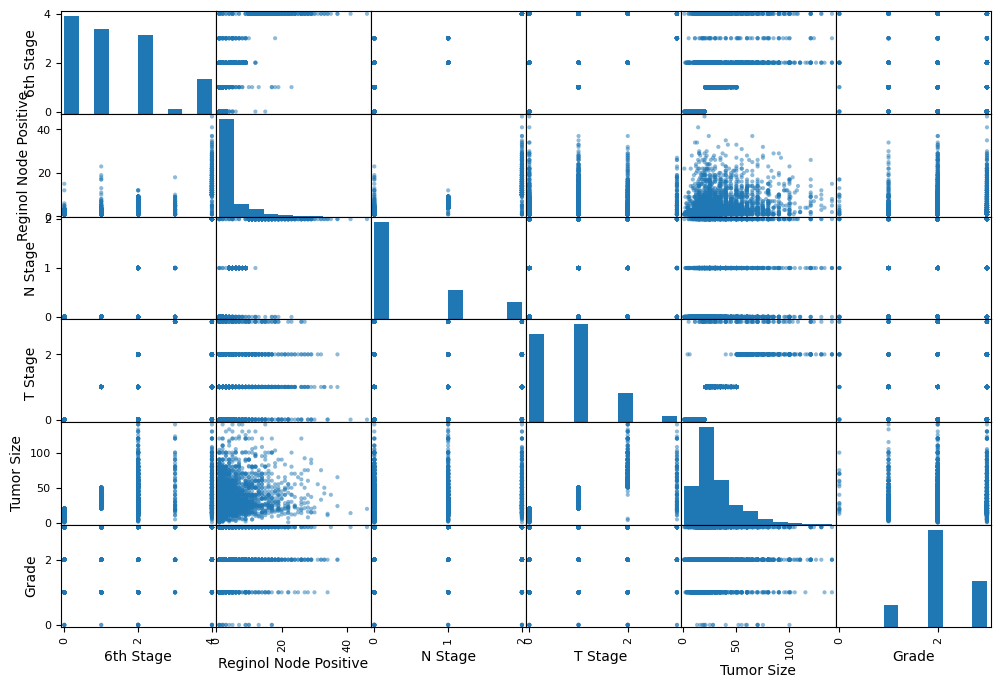

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["6th Stage", "Reginol Node Positive", "N Stage", "T Stage ","Tumor Size","Grade"]
scatter_matrix(df_breastCancer[attributes], figsize=(12, 8))

Eniten kuolleisuutta tuntuu vastaavan '6th Stage'

Seuraavassa kuvassa katsotaan tarkemmin näiden korrelaatiota ja tämän perusteella nähdään, että korrelaatiota on, mutta ei kovin merkittävästi.

<AxesSubplot:xlabel='Status;', ylabel='6th Stage'>

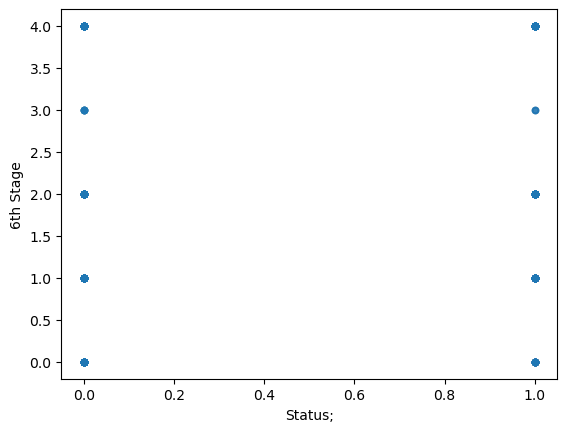

In [17]:
df_breastCancer.plot(kind="scatter", x="Status;", y="6th Stage", alpha=0.1)

Tarkistetaan vielä, että data on valmisteltu niin, että se on sopiva koneoppimista varten. Tämän vuoksi sarakkeiden arvot on muutettu numeerisiksi.

In [18]:
df_breastCancer.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status;
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


Erotellaan datasta opetussetti ja testisetti. Opetusdataa varten irrotetaan alkuperäisestä datasta 80 % osajoukko. Sen jälkeen otetaan testidata niin, että poisluetaan opetusdata testidatasta.

In [19]:
df_train = df_breastCancer.sample(frac=0.8, random_state=42)
df_test = df_breastCancer.drop(df_train.index)

In [20]:
print("Treenidimensiot:", df_train.shape, "Testidimensiot", df_test.shape)

Treenidimensiot: (3219, 16) Testidimensiot (805, 16)


Otetaan mallinnukseen muuttujat df_trainista eli opetusdatasta.

In [21]:
X_train = df_train.iloc[:,0:].to_numpy()
y_train = df_train.iloc[:,15].to_numpy()

print(X_train.shape, y_train.shape)

(3219, 16) (3219,)


Ylläolevasta nähdään, että opetusdataa on 3219 riviä ja siellä on 16 muuttujaa. Lisäksi vastauksia (y_train) on sama 3219.

Seuraavaksi tehdään mallinnusta. Otetaan sitä varten ensiksi kirjastoja käyttöön.

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=12)

Epoch 1/25
  1/215 [..............................] - ETA: 3:32 - loss: 3.4819e-08 - accuracy: 1.0000

Seuraavaksi jaetaan vielä testidata kahteen eri osajoukkoon.

In [ ]:
df_test_eval = df_test.sample(frac=0.20, random_state=42)
df_test_unseen = df_test.drop(df_test_eval.index)

In [ ]:
X_test_eval = df_test_eval.iloc[:,0:].to_numpy()
y_test_eval = df_test_eval.iloc[:,15].to_numpy()

Evaluointidatan joukko on 161:

In [ ]:
print(X_test_eval.shape, y_test_eval.shape)

In [ ]:
_, accuracy = model.evaluate(X_test_eval, y_test_eval)
print('Accuracy: %.2f' % (accuracy*100))

Yllä nähdään, että tarkkuus tällä testidatalla on 100 %.

Seuraavaksi mennään ennustuksiin ja tehdään se ennennäkemättömällä datalla.

In [ ]:
X_test_unseen = df_test_unseen.iloc[:,0:].to_numpy()
y_test_unseen = df_test_unseen.iloc[:,15].to_numpy()

In [ ]:
print(X_test_unseen.shape, y_test_unseen.shape)

Sovellusdataa tässä kohtaa ennennäkemättömällä datalla vajaa 650.

In [ ]:
preds = model.predict(X_test_unseen)

Seuraavasta nähdään todennäköisyydet kullekin havainolle. Jos arvo on enemmän kuin 0.5, niin silloin ennustamisessa oltaisiin varmoja siitä, että syöpään sairastunut on kuollut.

In [ ]:
preds

In [ ]:
preds_classes = (preds > 0.5).astype(int)

In [ ]:
print(preds_classes)

In [ ]:
print(preds_classes.shape, np.squeeze(preds_classes).shape, preds_classes[:,0].shape)

Mallin tarkkuuden laskeminen

In [ ]:
acc = np.count_nonzero(preds_classes[:,0] == y_test_unseen)/len(y_test_unseen)

In [ ]:
print(f"Accuracy with unseen {len(y_test_unseen)} samples: {acc*100:.3f}")

Tästä siis nähdään, että tarkkuus on sama kuin opetusdatassa.

Seuraavassa vielä nähdään, että miten malli on ennustanut arvoa ja onko se mennyt oikein (True=1, False=0)

In [ ]:
for i in range(10):
    print('%s => %s (expected %d)' % (X_test_unseen[i].tolist(), preds_classes[i], y_test_unseen[i]))